# Modeling

Let's create the Linear Regression Model :D

### Importing all of the libraries needed

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

sns.set()

In [56]:
import matplotlib
print("Pandas Version: ", pd.__version__)
print("NumPy Version: ", np.__version__)
print("Matplotlib Version: ", matplotlib.__version__)
print("Seaborn Version: ", sns.__version__)
print("Scikit-Learn Version: ", sklearn.__version__)

Pandas Version:  2.1.3
NumPy Version:  1.26.2
Matplotlib Version:  3.8.2
Seaborn Version:  0.13.0
Scikit-Learn Version:  1.3.2


## Load The Data

In [57]:
dataset = pd.read_csv('MELBOURNE_CLEANED_DUMMY.csv')
dataset.head()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29238 entries, 0 to 29237
Columns: 990 entries, Unnamed: 0 to Regionname_Western Victoria
dtypes: float64(10), int64(980)
memory usage: 220.8 MB


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29238 entries, 0 to 29237
Columns: 990 entries, Unnamed: 0 to Regionname_Western Victoria
dtypes: float64(10), int64(980)
memory usage: 220.8 MB


## Dependent and Independent Variables

Our target is `log_price`, while our input is other features

In [ ]:
target = dataset['log_price']
inputs = dataset.drop(['log_price'], axis=1)

In [ ]:
inputs.shape

(29238, 989)

### Scale the Data (Standardization)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

# Why do we standardize our inputs now? It's because we have changed the categorical variables into dummy variable, which makes the data more linear.

StandardScaler()

In [ ]:
scaled_inputs = scaler.transform(inputs)
scaled_inputs

array([[-1.73199157, -1.03509308, -1.34353506, ..., -0.70384437,
        -0.49943346, -0.05556699],
       [-1.73187309, -1.03509308, -1.34353506, ..., -0.70384437,
        -0.49943346, -0.05556699],
       [-1.73175461, -1.03509308, -1.34353506, ..., -0.70384437,
        -0.49943346, -0.05556699],
       ...,
       [ 1.73175461, -1.03509308, -0.72336957, ..., -0.70384437,
         2.00226871, -0.05556699],
       [ 1.73187309,  0.20885659, -0.72336957, ..., -0.70384437,
         2.00226871, -0.05556699],
       [ 1.73199157, -1.03509308, -0.72336957, ..., -0.70384437,
         2.00226871, -0.05556699]])

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, target, train_size = 0.2, random_state = 42)

## Regression Itself

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_hat = model.predict(x_train)

Text(0, 0.5, 'y_train')

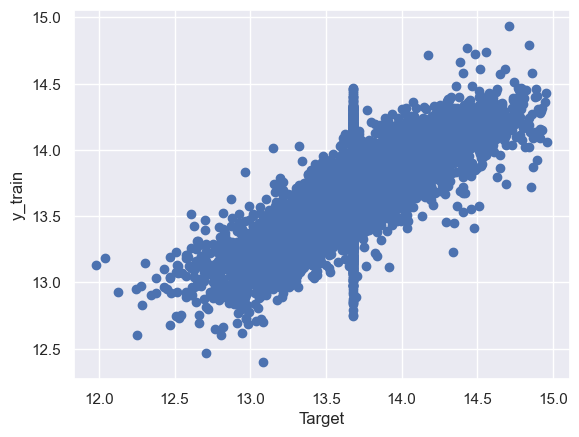

In [ ]:
plt.scatter(y_train, y_hat)
plt.xlabel("Target")
plt.ylabel("y_train")

### Residual Plot

It refers to the distribution of the residuals (Differences between the targets and the predictions)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23412\980077577.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


Text(0.5, 1.0, 'Residuals PDF')

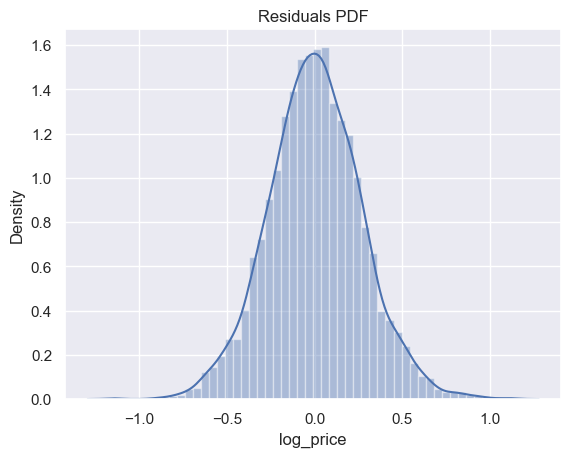

In [ ]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF")

Based on OLS assumptions, we know that the errors must be normally distributed with a mean of zero. However, as it's shown on the figure above, we could say its normally distributed

### Evaluating the Regression Model using R-Squared

In [ ]:
model.score(x_train, y_train)

0.5970841834064435

#### Calculate the Adjusted R-squared

Adjusted R-Squared Formula

$
R^2_{adj.}=1-(1-R^2)*\frac{n-1}{n-p-1}
$

Where,
- n = number of observation
- p = number of predictors


In [ ]:
n = x_train.shape[0]
p = x_train.shape[1]

adjusted_r2 = 1 - (1 - model.score(x_train, y_train)) * (n - 1) / (n - p - 1)
adjusted_r2

0.5150409998340681

Based on the comparison between the R-Squared and the Adj. R-Squared, we know that there are several features that seems to be useless in this analysis, but which one?

### Finding the Weight and Bias

In [ ]:
model.intercept_

-86994730313.49973

In [ ]:
model_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
model_summary['Weights'] = model.coef_
model_summary

,Features,Weights
0,Unnamed: 0,3.014339e-02
1,Rooms,1.307912e-01
2,Distance,-1.127285e-01
3,Bathroom,1.584675e-02
4,Car,9.054036e-03
...,...,...
984,Regionname_Northern Victoria,-8.859089e+11
985,Regionname_South-Eastern Metropolitan,2.077182e+12
986,Regionname_Southern Metropolitan,2.590165e+11
987,Regionname_Western Metropolitan,1.156638e+12


As you can see, those weights are some positives and some negatives. What is the meaning of weights?

- **POSITIVE WEIGHTS** = As a feature increases in value, so does the `log_price` or the price of the house, respectively
- **NEGATIVE WEIGHTS** = As a feature increases in value, the `log_price` or the price of the house will also **decreases**

While for the dummies, it means that,
- **POSITIVE WEIGHTS** shows that the respective category is more expensive rather than the benchmark (the first column of the category)
- **NEGATIVE WEIGHTS** the respective category is cheaper rather than the benchmark

## Testing

In [ ]:
dataset.isnull().sum()

Unnamed: 0                               0
Rooms                                    0
Distance                                 0
Bathroom                                 0
Car                                      0
                                        ..
Regionname_Northern Victoria             0
Regionname_South-Eastern Metropolitan    0
Regionname_Southern Metropolitan         0
Regionname_Western Metropolitan          0
Regionname_Western Victoria              0
Length: 990, dtype: int64

In [ ]:
y_hat_test = model.predict(x_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values